### Welcome to the Southern Water Corp Python Case Study!

While working on the Statistics unit, you used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's Pump Data.

Now, Joanna Luez — Southern Water Corp's Lead Scientist — has requested that you convert your earlier analysis in Excel to Python Code. After all, with all the formulas in Excel, it can be tricky for others with less experience in Excel to follow.

Excel is an excellent tool for adhoc analysis, but Python is an invaluable tool thanks to its advanced data analysis capabilities that only take a few lines of code to complete.

**Please note that this case study is composed of two parts** — once you have completed part 1, which involves descriptive statistics, please submit your work and discuss it with your mentor before moving on to part 2. 

### Let's get started!

---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

Import the libraries you'll need for your analysis. You will need the following libraries:  

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. 

Don't forget that to modify the matplotlib plot sizes so they're at a comfortable reading size you should use the following:

**import matplotlib as mpl**

**mpl.rcParams['figure.figsize'] = (20,5)**

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodels.api** - This library will enable you to create statistical models. You will need this library when performing regession analysis in Part 2 of this case study.

## Place your code here

In [1]:
# Import required libraries

import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
The data you've received from Southern Water Corp has been split into two files.
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data you will need for your analysis.
The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data you will need for questions 10 Onwards.

We have **deliberately** set up the data in this manner so please ensure that when you need to perform the rolling standard deviation calculations, you use the **DF_Rolling_Stdev.csv** file.

i. Import each of the two data sources and store them into their individual dataframes. 
Suggested names: **dataframe_raw & dataframe_stdev respectively**. 
Don't forget to use the **header** argument to ensure your columns have meaningful names! 

ii. Print descriptive statistics for each of the dataframes using **.describe()** and **.info()**

In [2]:
# (i)
# Import datasets
dataframe_raw = pd.read_csv("DF_Raw_Data.csv", header=0)
dataframe_stdev = pd.read_csv("DF_Rolling_Stdev.csv", header=0)

# (ii)
# Statistics for data raw
print('Raw Data')
print(dataframe_raw.describe())
print(dataframe_raw.info)

# Statistics for data rolling
print('Rolling Data')
print(dataframe_stdev.describe())
print(dataframe_stdev.info)

Raw Data
       Volumetric Flow Meter 1  ...  PUMP FAILURE (1 or 0)
count              2453.000000  ...            2453.000000
mean                 41.802629  ...               0.021199
std                   3.656576  ...               0.144075
min                   0.000000  ...               0.000000
25%                  41.050000  ...               0.000000
50%                  42.100000  ...               0.000000
75%                  43.140000  ...               0.000000
max                  45.900000  ...               1.000000

[8 rows x 8 columns]
<bound method DataFrame.info of      Data Source TIMEFRAME (DD/MM/YYYY)  ...  Pump Efficiency  PUMP FAILURE (1 or 0)
0            Raw         9/12/2014 0:00  ...            74.84                      0
1            Raw         9/12/2014 0:01  ...            75.25                      0
2            Raw         9/12/2014 0:02  ...            74.82                      0
3            Raw         9/12/2014 0:03  ...            74.42     

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

When you look at your dataframe, you should now be able to see the upper and lower quartiles for each row of data from the **.info** command you used previously.

You should now also have a rough sense of the number of entires in each dataset (~2,452). However, just as you learned when using Excel, creating a visualization of the data using Python is often more informative than viewing the table statistics. Next up — convert the tables you created into a boxplot by following these instructions:

i) Using the dataframe_raw, create a boxplot visualising this information.

ii) Using the dataframe_raw, create a lineplot visualising this information.

Hint: You might want to reference the following .plot function (https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)

### Please put your code here


#### We've included an example of what your Box Plot *should* look like once you've plotted this using the dataframe_raw dataset

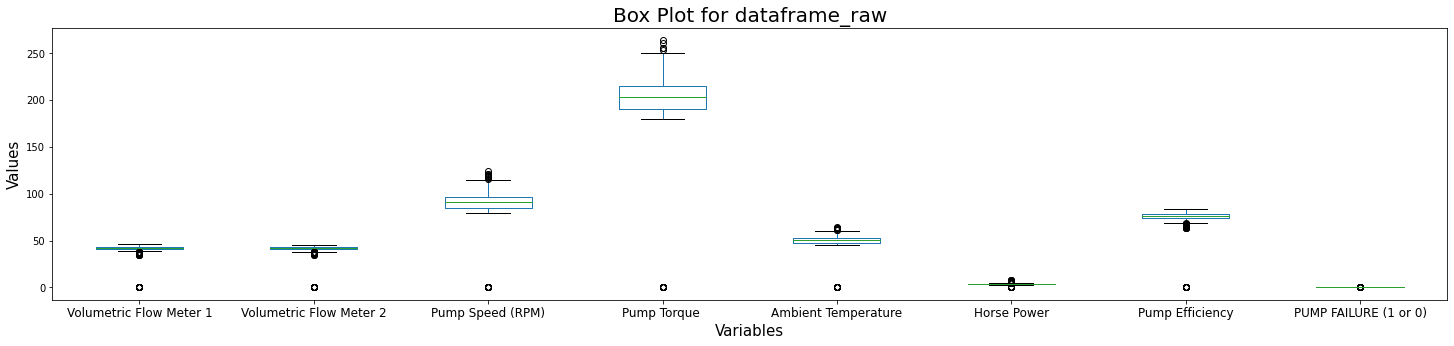

In [3]:
# (i)
# Boxplot for dataframe_raw

plt.rcParams['figure.figsize'] = (25,5)
dataframe_raw.plot(kind = 'box')

plt.xlabel('Variables', fontsize= 15)
plt.ylabel('Values', fontsize=15)  
plt.title('Box Plot for dataframe_raw', fontsize=20)
plt.xticks(fontsize=12)
plt.show()

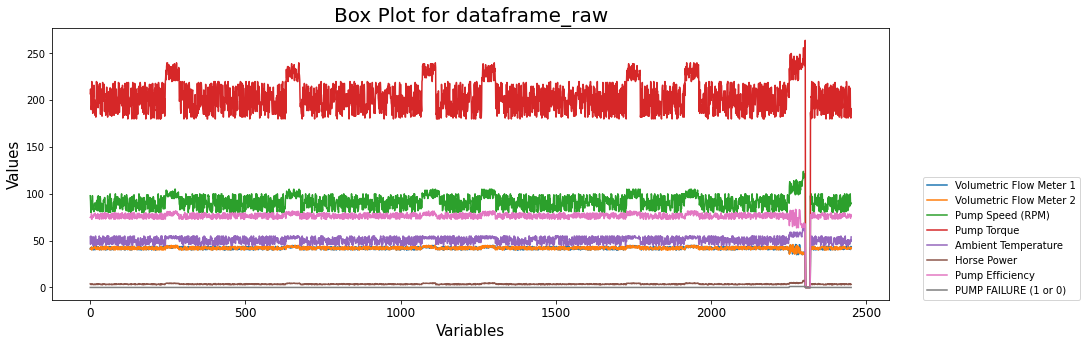

In [4]:
# (ii)
# Lineplot for dataframe_raw

plt.rcParams['figure.figsize'] = (15,5)
dataframe_raw.plot(kind = 'line')

plt.xlabel('Variables', fontsize= 15)
plt.ylabel('Values', fontsize=15)  
plt.title('Box Plot for dataframe_raw', fontsize=20)
plt.xticks(fontsize=12)
plt.legend(loc=(1.04,0))
plt.show()

### **What have you observed from the boxplot and line plots?**

In box plot and line plot there is no information regrading which set of values yields pump failure as 0 and which yields 1. It can also be seen that there is no need to plot pump failure since we know that it contains only two values either 0 or 1. Therefore, its box plot is saturated at one point only and its line plot gives an almost straight line. It can also be seen that different variables have different ranges and plotting them like this makes it hard to visualize their variations.

### You would probably note that it might seem that some variables, due to their range and size of values, dwarfs some of the other variables which makes the variation difficult to see. 

### More importantly, the dataset we do have contains Pump Failure Data where it has failed (i.e. Pump Failure = 0) as well as when it is operating normally. We should separate this data accordingly to more effectively visualise the information.

---------------------------------------------------------------------------

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered Dataframes with Box Plots</span> 

i) Using the dataframe_raw dataset, create two boxplots specifically for when the Pump has failed (i.e. Pump Failure = 1)  and 0 (Pump is in normal operations). 

As part of best practice, don't forget to clearly title your box plots so we can identify which plot is for the failure and which plot is for the normal operations.

To do this, you'll have to recall how to apply **boolean** filtering to a dataframe.



## Please put your code here

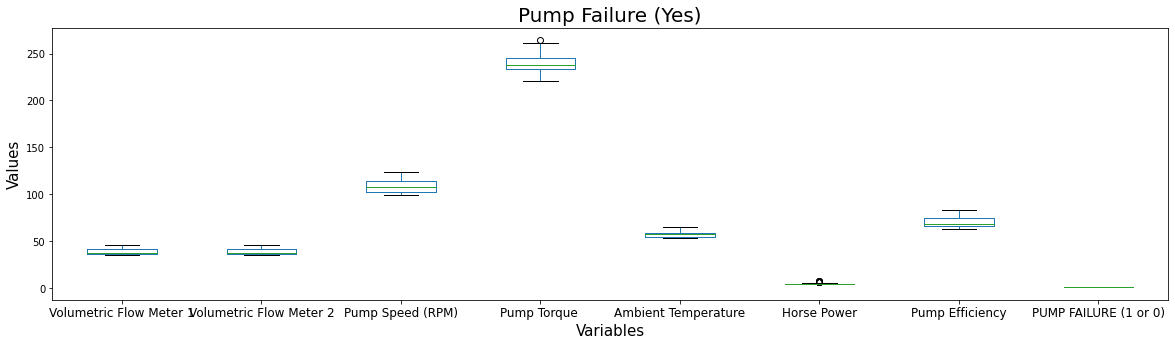

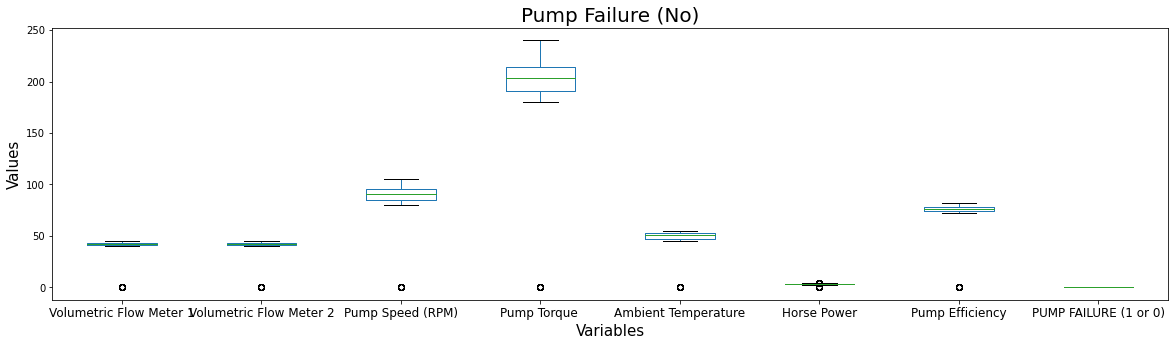

In [5]:
# (i)
# Apply filters
df_yes = dataframe_raw[dataframe_raw['PUMP FAILURE (1 or 0)'] == 1]
df_no = dataframe_raw[dataframe_raw['PUMP FAILURE (1 or 0)'] == 0]

# Pump failed
plt.rcParams['figure.figsize'] = (20,5)
fig_yes = df_yes.plot(kind = 'box')
plt.xlabel('Variables', fontsize= 15)
plt.ylabel('Values', fontsize=15)  
plt.title('Pump Failure (Yes)', fontsize=20)
plt.xticks(fontsize=12)
plt.show()

# Pump did not fail
plt.rcParams['figure.figsize'] = (20,5)
fig_yes = df_no.plot(kind = 'box')
plt.xlabel('Variables', fontsize= 15)
plt.ylabel('Values', fontsize=15)  
plt.title('Pump Failure (No)', fontsize=20)
plt.xticks(fontsize=12)
plt.show()

**Open-ended Question:**
### What have you noticed when you compared the dataset in this manner?

It can be seen that the data where pump has not failed has significantly more outliers compared to data where pump failed.

### From analysing the boxplots, you might notice that there seem to be a number of outliers. We might want to see if we can actively remove this with Python. 
When you did this work in Excel, you used the interquartile ranges to remove the outliers from each column. Happily, Python allows you to do this same process more quickly and efficiently, as you'll see when working on  <span style="color:green">Step 5</span>.

---------------------------------------------------------------------------

### Step 5: <span style="color:green">Create Quartiles</span> 

i) Create two new variables called Q1 and Q3. 

Q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe.

ii) Calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

## Please put your code here

In [6]:
# (i)
# Creating quartiles
Q1 = dataframe_raw.quantile(0.25)
Q3 = dataframe_raw.quantile(0.75)

# (ii)
# Interquartile range
IQR = Q3 - Q1
    
print('75th PERCENTILE\n')
print(Q3)
print('\n25th PERCENTILE\n')
print(Q1)
print('\nINTERQUARTILE RANGE\n')
print(IQR)

75th PERCENTILE

Volumetric Flow Meter 1     43.14
Volumetric Flow Meter 2     43.13
Pump Speed (RPM)            97.00
Pump Torque                215.00
Ambient Temperature         53.00
Horse Power                  3.78
Pump Efficiency             78.47
PUMP FAILURE (1 or 0)        0.00
Name: 0.75, dtype: float64

25th PERCENTILE

Volumetric Flow Meter 1     41.05
Volumetric Flow Meter 2     41.00
Pump Speed (RPM)            85.00
Pump Torque                191.00
Ambient Temperature         48.00
Horse Power                  3.22
Pump Efficiency             74.56
PUMP FAILURE (1 or 0)        0.00
Name: 0.25, dtype: float64

INTERQUARTILE RANGE

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

How many outliers do you have? What will happen to your dataset if you remove them all? Let's find out!

i) Calculate how many entries you currently have in the original dataframe.

ii) Using the quartiles and IQR previously calculated, identify the number of entries you'd have if you were to remove the outliers.

ii) Find the proportion of outliers that exist in the dataset.



## Please put your code here

In [7]:
# Removing outliers
outliers = dataframe_raw[~((dataframe_raw < (Q1 - 1.5 * IQR)) | (dataframe_raw > (Q3 + 1.5 * IQR))).any(axis=1)]

# (i)
print ("When we have not removed any outliers from the dataset, we have " + str(len(dataframe_raw))  + " entries.")

# (ii)
print ("When we have removed outliers from the dataset, we have " + str(len(outliers)) + " entries.")

# (ii)
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(len(outliers)/len(dataframe_raw)) ) 

When we have not removed any outliers from the dataset, we have 2453 entries.
When we have removed outliers from the dataset, we have 2358 entries.
The proportion of outliers which exist when compared to the dataframe are: 0.9612719119445576


### Having removed the outliers from the dataset - do we think this is a good option? Why or why not?

As it can be seen the proportion of outliers is 0.96 and only 95 entries are outliers so removing them would not reduce the dataset significantly but would increase data performance. Therefore, removing outliers is a good option.

---------------------------------------------------------------------------

### Step 7: <span style="color:green">Create a Boxplot without Outliers</span> 

With the dataset now stripped of outliers, create the following boxplots:

i) A boxplot when PUMP FAILURE is 1 (Check what the **length** of the dataframe is before you try and plot this. You may be surprised!)

ii) A boxplot when PUMP FAILURE is 0 

#### Note 1: Removing outliers is very situational and specific. Outliers can skew the dataset unfavourably; however, if you are doing a failure analysis, it is likely those outliers actually contain valuable insights you will want to keep as they represent a deviation from the norm that you'll need to understand. If you remove all the outliers - you might discover you have nothing to plot...!


## Please put your code here

Length of dataframe_raw:  2453


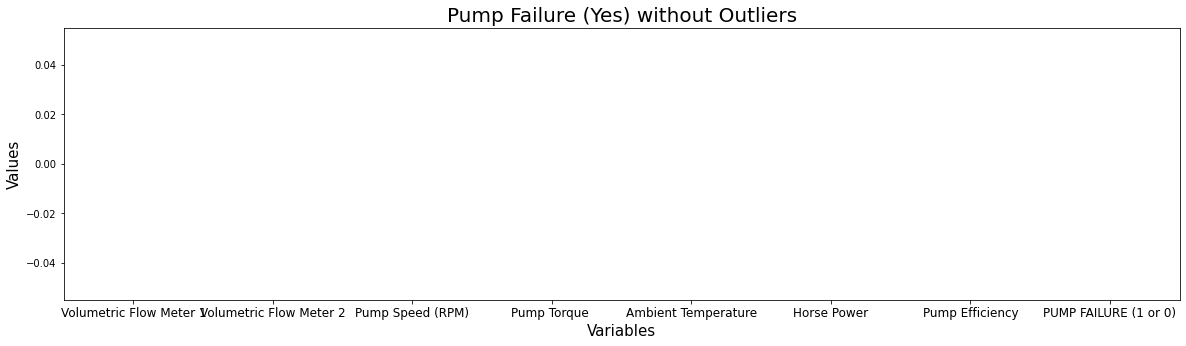

In [9]:
# (i)
# Pump Failure (Yes) without outliers

mpl.rcParams['figure.figsize'] = (25,5)

print('Length of dataframe_raw: ', len(dataframe_raw))

# Filter to remove outliers
outliers = dataframe_raw[~((dataframe_raw < (Q1 - 1.5 * IQR)) |(dataframe_raw > (Q3 + 1.5 * IQR))).any(axis=1)]
yes = outliers[outliers['PUMP FAILURE (1 or 0)'] == 1]

plt.rcParams['figure.figsize'] = (20,5)
fig_yes = yes.plot(kind = 'box')
plt.xlabel('Variables', fontsize= 15)
plt.ylabel('Values', fontsize=15)  
plt.title('Pump Failure (Yes) without Outliers', fontsize=20)
plt.xticks(fontsize=12)
plt.show()

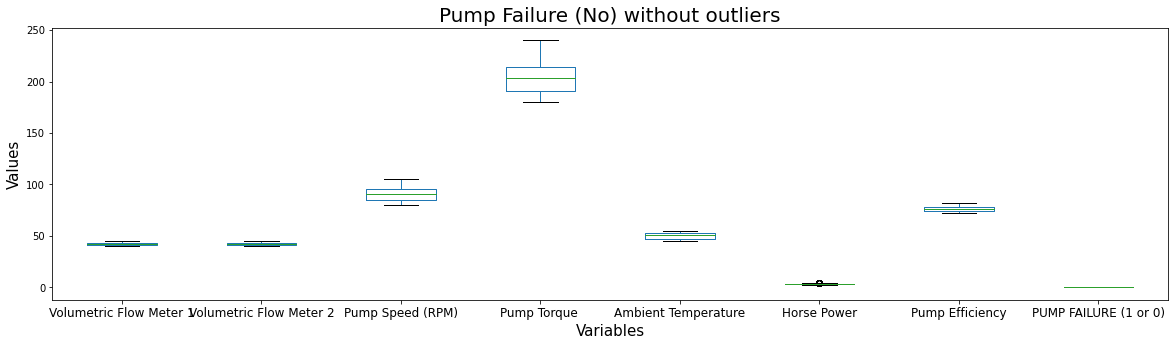

In [10]:
# (ii)
# Pump Failure (No) without outliers

no = outliers[outliers['PUMP FAILURE (1 or 0)'] == 0]

plt.rcParams['figure.figsize'] = (20,5)
fig_yes = no.plot(kind = 'box')
plt.xlabel('Variables', fontsize= 15)
plt.ylabel('Values', fontsize=15)  
plt.title('Pump Failure (No) without outliers', fontsize=20)
plt.xticks(fontsize=12)
plt.show()

### Based on the boxplots you've created, you've likely come to the conclusion that, for this case study, you actually _shouldn't_ remove the outliers, as you are attempting to understand the Pump Failure Behavior and the portion of data you need is actually stored WITHIN the Outliers.

### This is exactly why you should never remove Outliers without Subject Matter Expertise input. Otherwise valuable information may be discarded.

-----

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 

As you might recall from the earlier plot you had made with the line plot; it was hard to see which variables were the most significant with respect to pump failure when all the variables are plotted together. This is why we are going to ITERATE through the dataframe and plot each individual variable out and compare this with the Pump Failure.

This will require you to make use of the following syntax:

#### for variable in listOfVariables:
    #Loop through each variable in the dataframe (i.e. dataframe[___].plot
    #Specify the dual-axis (i.e. ax.twinx())
    #Plot the Pump Failure (1 or 0) on the secondary axes
    #Include Plot Titles for each plot (i.e. print ("This is for the attribute " + i))
    
#### Using the syntax provided, loop through the dataframe_raw dataset, plotting every variable individually, against the Pump Failure to better identify trends.

**Note:** For each plot, ensure that you have a dual axis set up so you can see the Pump Behaviour (0 or 1) on the second Y-axis, and the attribute on the first Y-Axis. It might be helpful to give the failureState it's own color and add a legend to the axis to make it easier to view. 

Check out this link to learn how to do this: https://matplotlib.org/gallery/api/two_scales.html

##### Note: Please ensure that the dataframe you are plotting contains all the outliers and that the Pump Failure Behaviour includes both the 0 and 1 State.

## Please put your code here

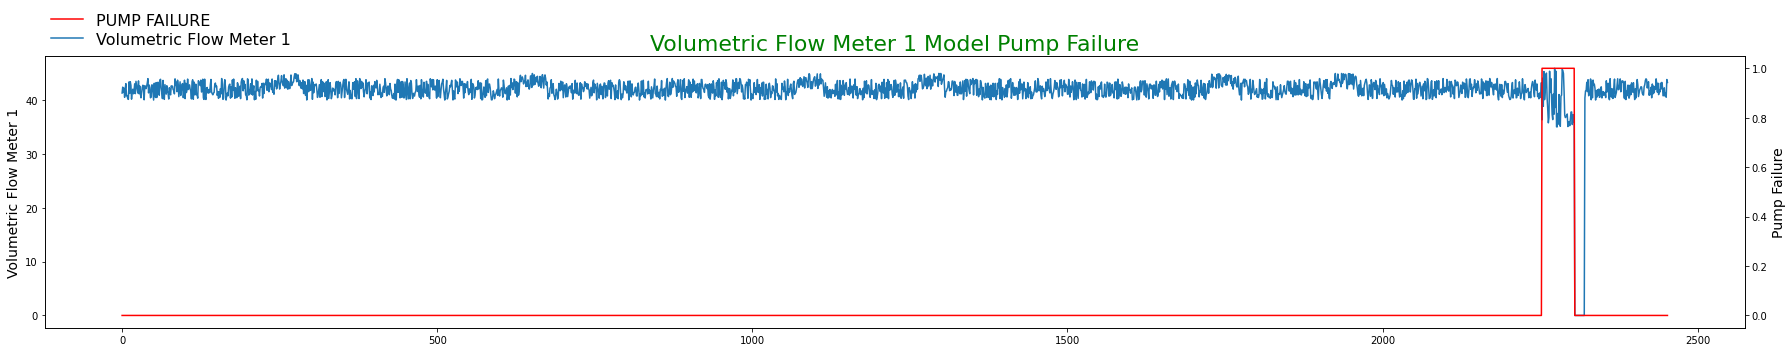

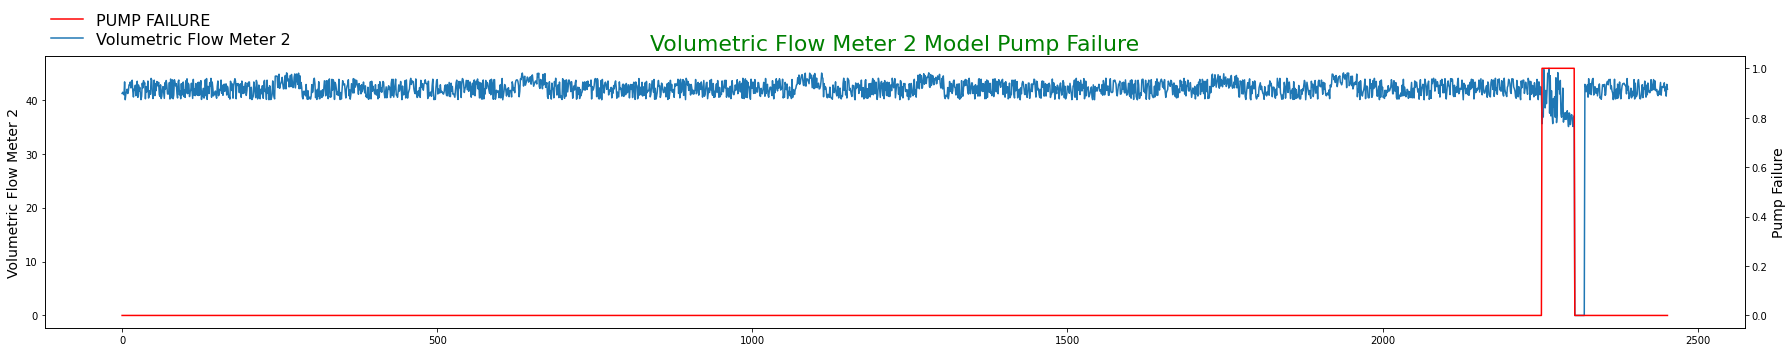

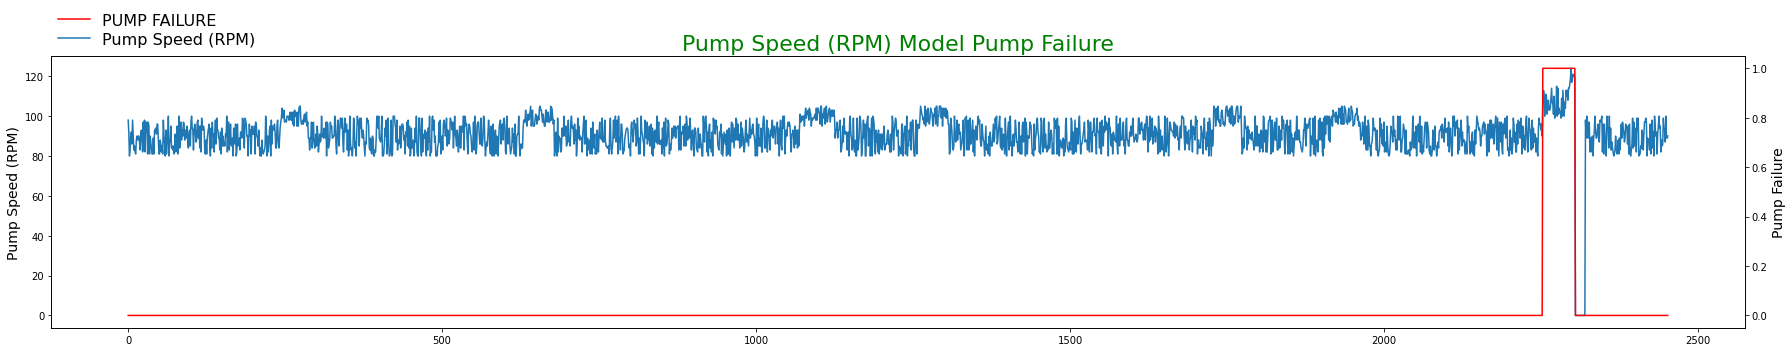

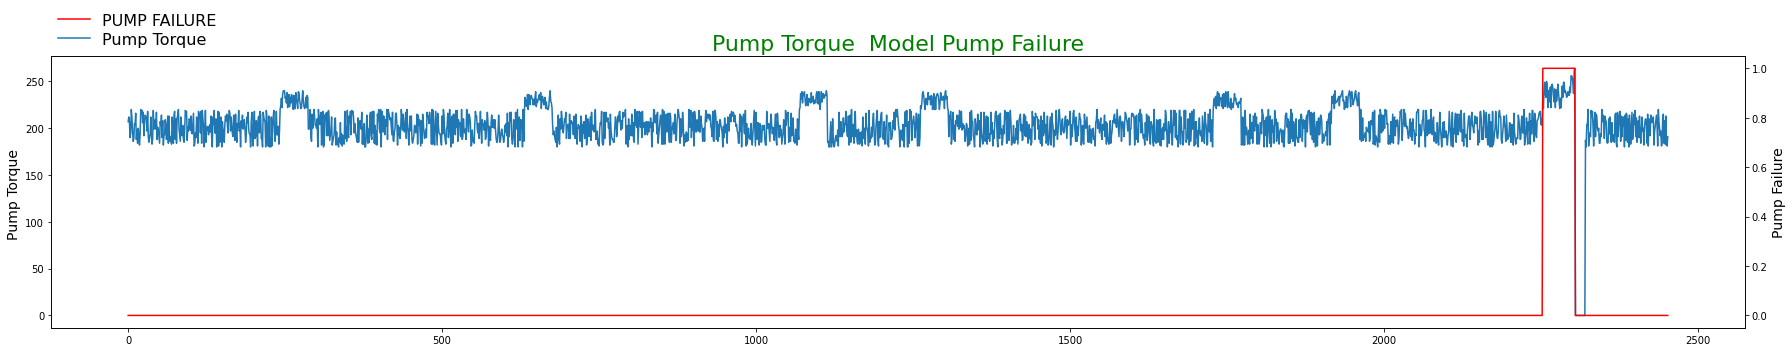

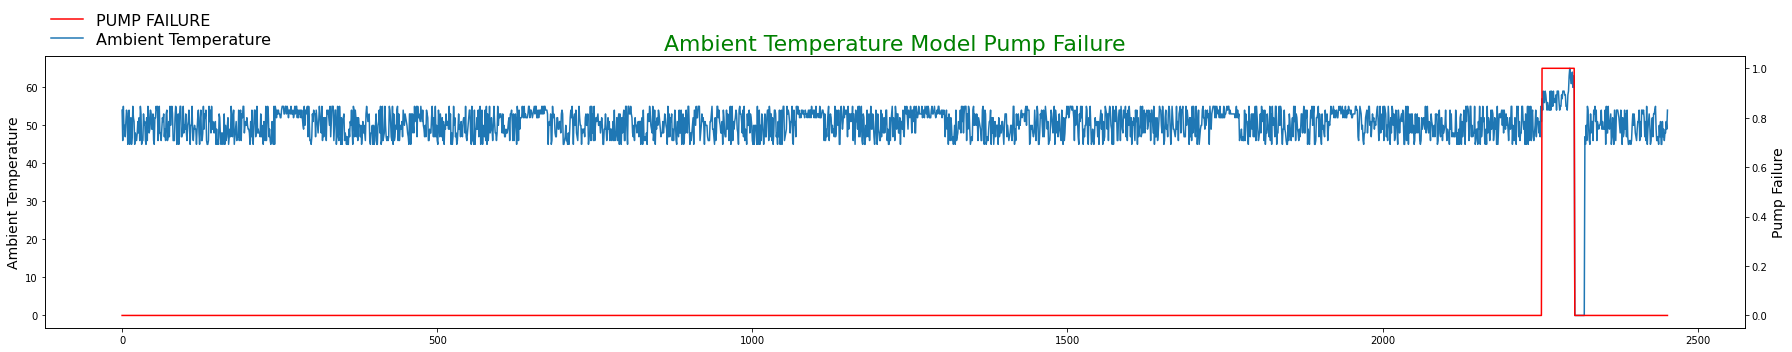

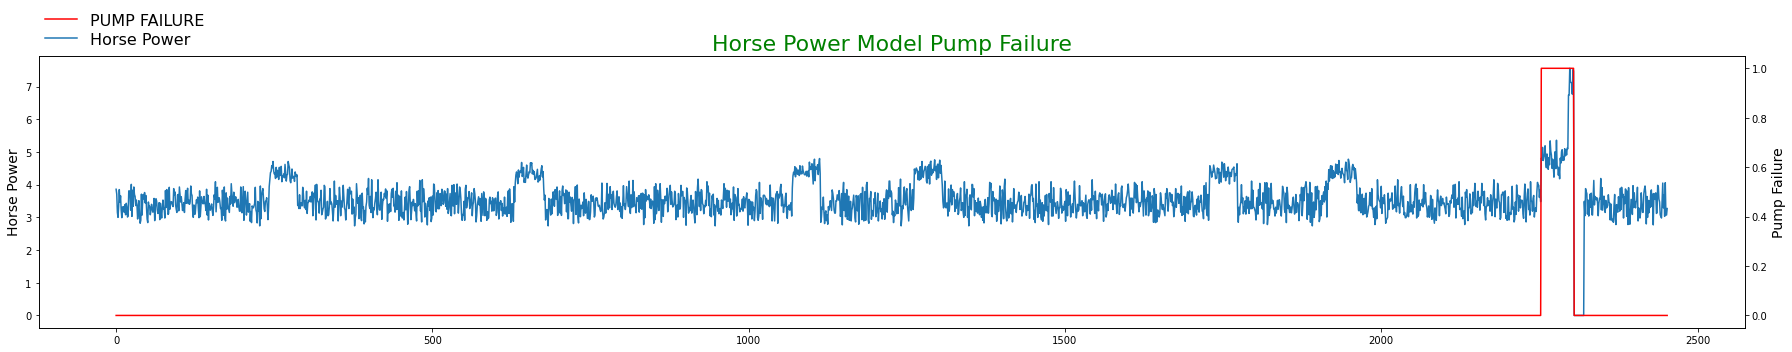

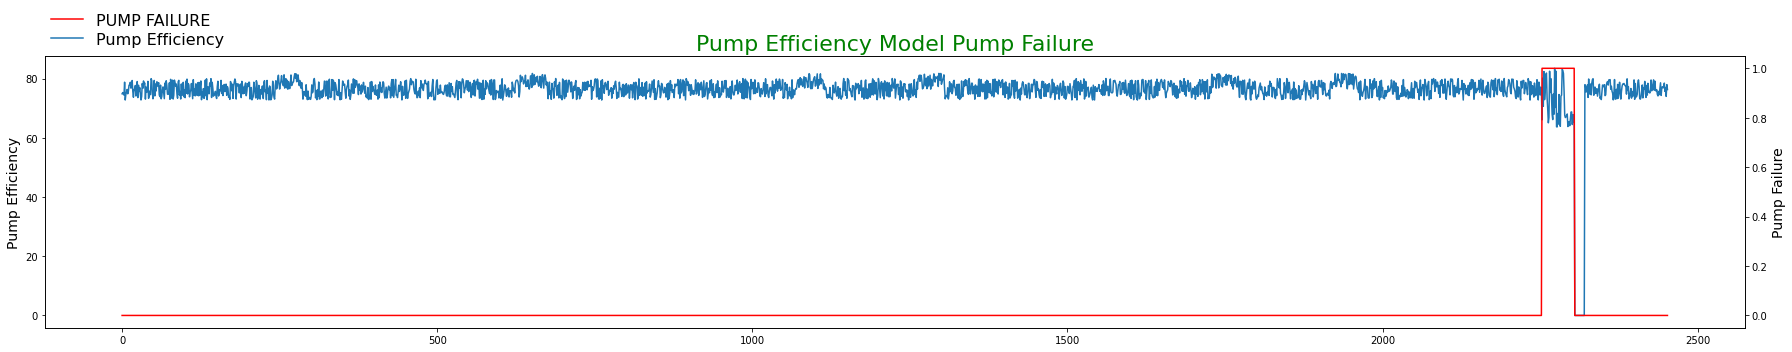

In [11]:
# Fill NaN with 0
dataframe_raw['PUMP FAILURE (1 or 0)'].fillna(0,inplace=True)
dataframe_raw.dropna(inplace=True)

# Specify the columns/variables/features
col = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)',
       'Pump Torque ', 'Ambient Temperature',
       'Horse Power', 'Pump Efficiency']

# Specify label
label = ['PUMP FAILURE (1 or 0)']
column_names = dataframe_raw[col].columns
mpl.rcParams['figure.figsize'] = (25,5)

# Iterate through all variables
for i in column_names:

    state = dataframe_raw[label]
    ax1 = dataframe_raw[i].plot()
    ax1.set_ylabel(i, fontsize=14)
    ax2 = ax1.twinx()
    ax2.plot(state, 'red', label='PUMP FAILURE')
    ax2.set_ylabel("Pump Failure", fontsize=14)
    
    ax1.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,borderaxespad=0, frameon=False, fontsize=16)
    ax2.legend(loc='lower left', bbox_to_anchor= (0.0, 1.08), ncol=2,borderaxespad=0, frameon=False, fontsize=16)
    
    maxTime = dataframe_raw.index.max()
    minTime = dataframe_raw.index.min()
   
    plt.tight_layout()
    plt.title(i + " Model Pump Failure",fontsize = 22, color='green')
 
    plt.show()

### What do you notice when looking at the data in this way? Do any particular trends emerge?

The trend that can be observed is that the Pump fails when Volumetric Flow Meter 1, Volumetric Flow Meter 2 and Pump Efficiency decreases, Pump Speed, Pump Torque, Ambient Temperature and Horse Power increases.


Of course, given that all the attributes have varying units, you might need more than one plot to make sense of all this data. For this next step, let's view the information by comparing the <b>ROLILNG DEVIATIONS</b> over a 30-point period. 

This is where we will switch to using the dataframe_stdev that you had previously defined in Q1.

As the deviations will likely be a lot lower, the scale should be much simpler to view on one plot.
Make sure that you include the 'PUMP FAILURE 1 or 0' attribute on the secondary Y-axis. 

#### Hint: Remember to make use of the Dual-Axis plot trick you learned in the previous exercise!


---

### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Set the **index** of the dataframe to the TIMEFRAME (DD/MM/YYYY) attribute


ii) Exactly as you did in Q8, Re-plot all variables, now transformed via a rolling standard deviation in the dataframe_stdev for the time period 10/12/2014 13:30 to 10/12/2014 14:30 against Pump Failure.

Note: To effectively filter on the time period you will need to make use of the below syntax
    # dataframe_time_filtered = dataframe[(dataframe.index >= "_____") & (dataframe.index <= "_____")


## Please put your code here

In [12]:
# print timeframe column for insights
print(dataframe_stdev['TIMEFRAME (DD/MM/YYYY)'])

0       9/12/2014 0:00
1       9/12/2014 0:01
2       9/12/2014 0:02
3       9/12/2014 0:03
4       9/12/2014 0:04
             ...      
2447    9/12/2014 0:26
2448    9/12/2014 0:27
2449    9/12/2014 0:28
2450    9/12/2014 0:29
2451    9/12/2014 0:30
Name: TIMEFRAME (DD/MM/YYYY), Length: 2452, dtype: object


                                      Data Source  ...  PUMP FAILURE (1 or 0)
TIMEFRAME (DD/MM/YYYY)                             ...                       
10/12/2014 13:30        Rolling Stdev (30 Minute)  ...                      0
10/12/2014 13:31        Rolling Stdev (30 Minute)  ...                      0
10/12/2014 13:32        Rolling Stdev (30 Minute)  ...                      0
10/12/2014 13:33        Rolling Stdev (30 Minute)  ...                      1
10/12/2014 13:34        Rolling Stdev (30 Minute)  ...                      1
...                                           ...  ...                    ...
10/12/2014 14:26        Rolling Stdev (30 Minute)  ...                      0
10/12/2014 14:27        Rolling Stdev (30 Minute)  ...                      0
10/12/2014 14:28        Rolling Stdev (30 Minute)  ...                      0
10/12/2014 14:29        Rolling Stdev (30 Minute)  ...                      0
10/12/2014 14:30        Rolling Stdev (30 Minute)  ...          

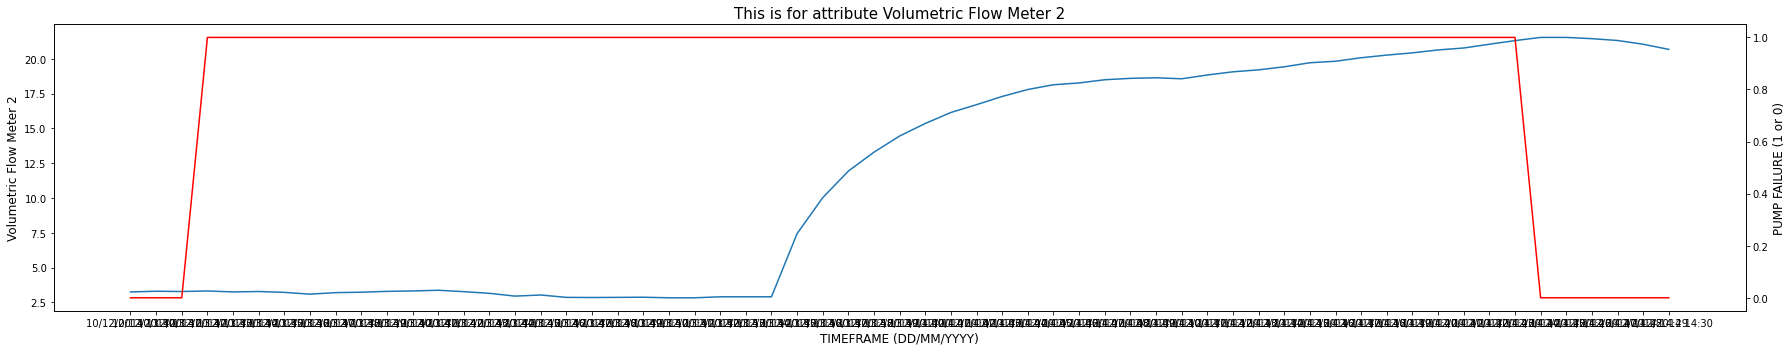

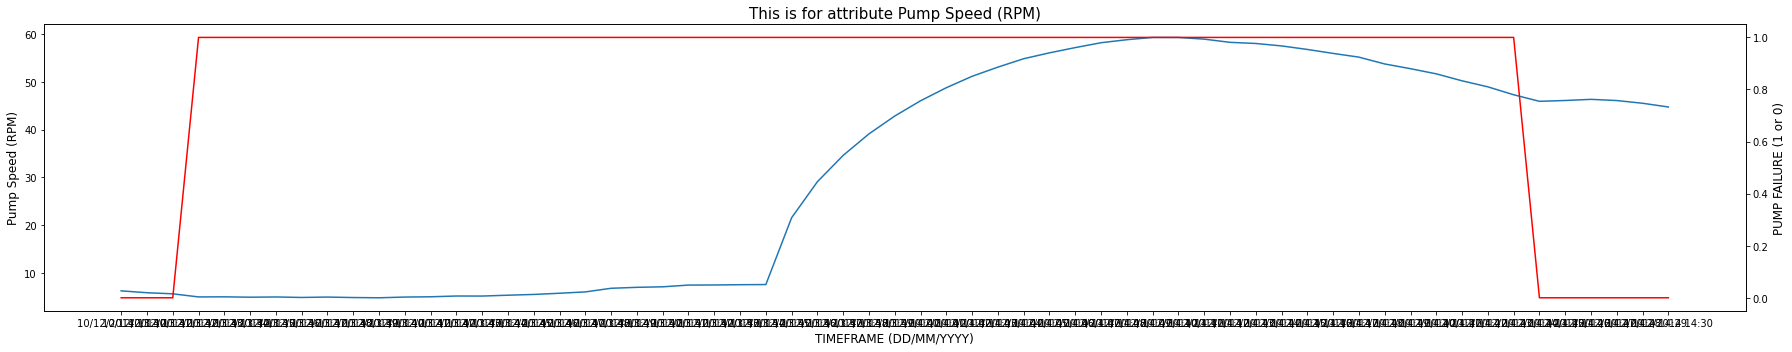

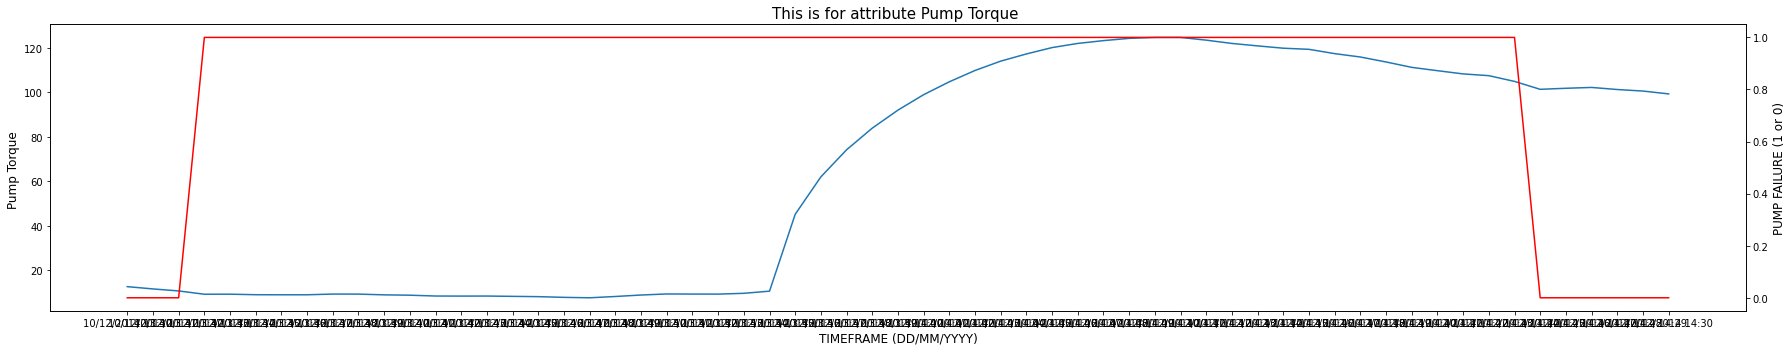

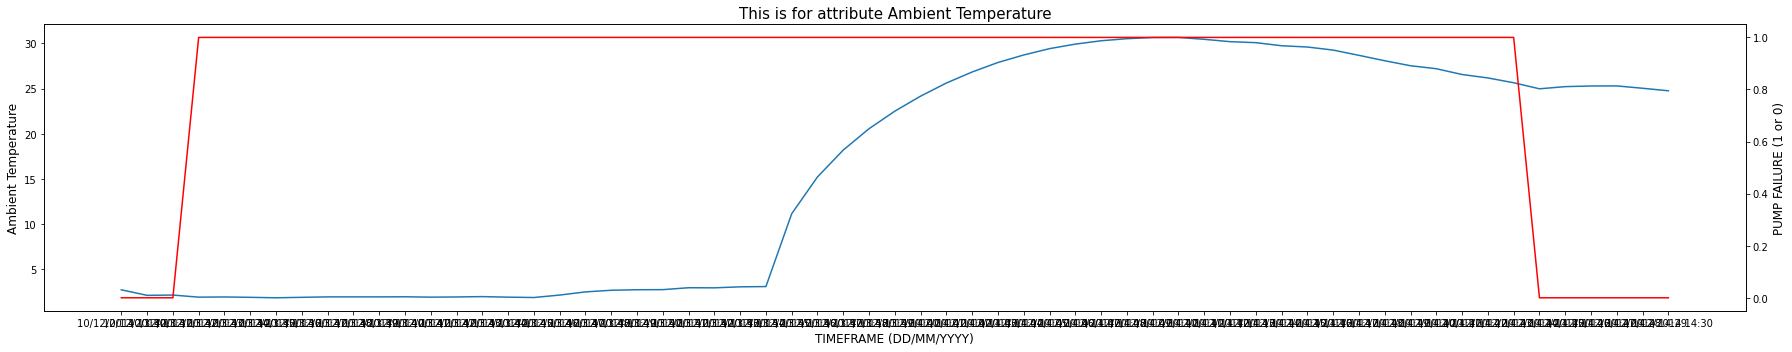

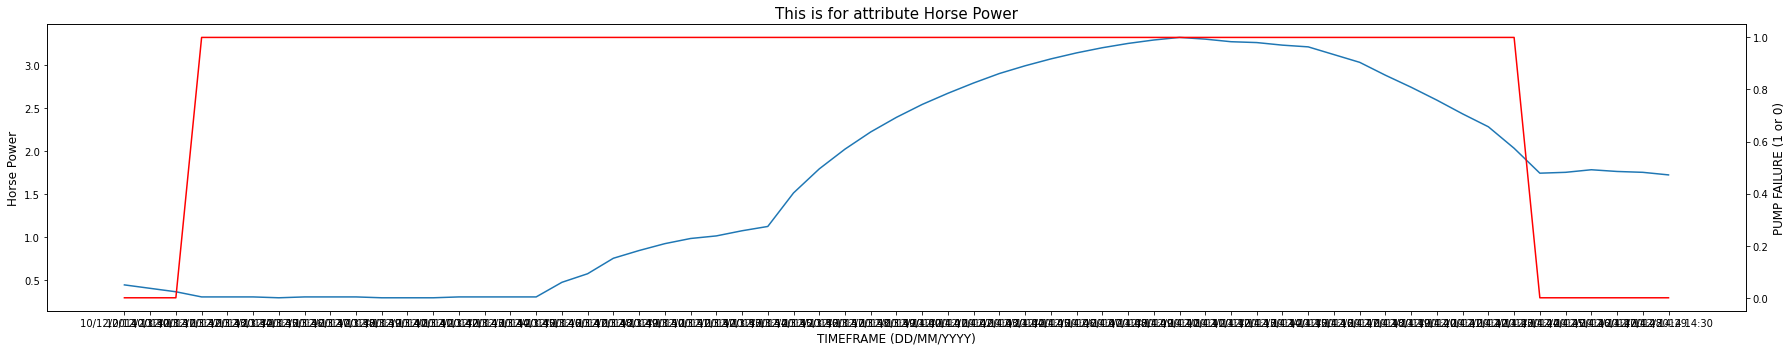

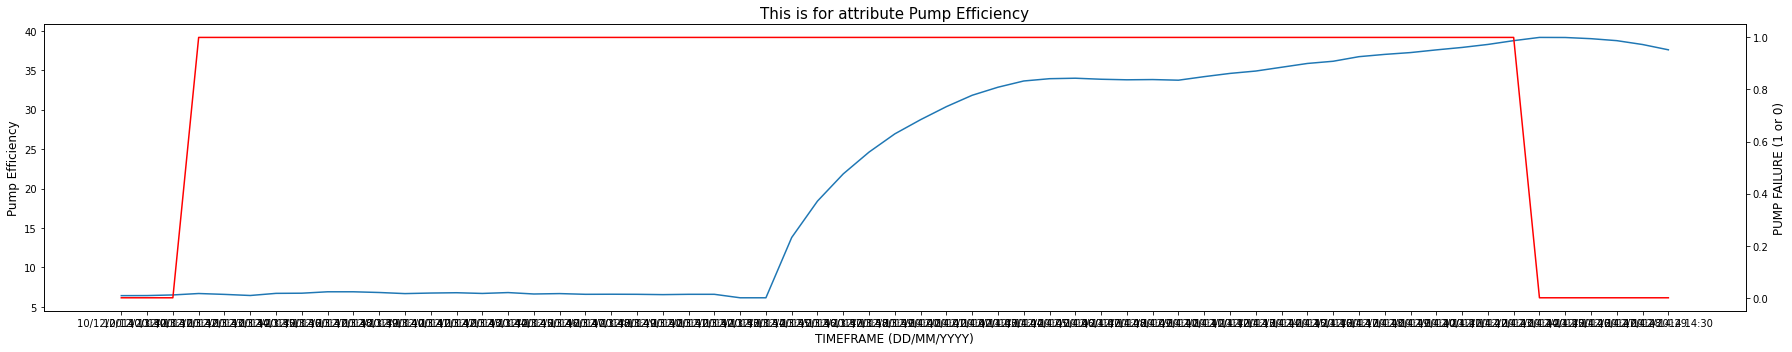

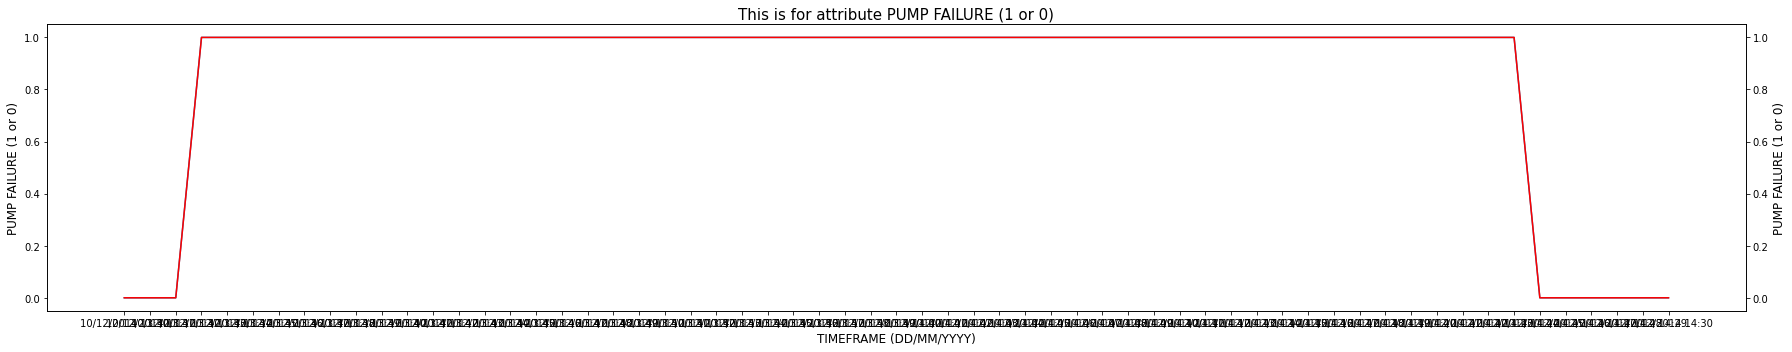

In [13]:
# (i)
# Set timeframe to index
dataframe_stdev = dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')

# (ii)
# Filter data within the required timeframe
filtered_stdev = dataframe_stdev[(dataframe_stdev.index >= "10/12/2014 13:30") & (dataframe_stdev.index <= "10/12/2014 14:30")]
print(filtered_stdev)

# Iterate through the variables stated before
for col in filtered_stdev.columns[2:9]:
       
    time = filtered_stdev.index
    col_data = filtered_stdev[col]
    label = filtered_stdev['PUMP FAILURE (1 or 0)']

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('TIMEFRAME (DD/MM/YYYY)', fontsize = 12)
    ax1.set_ylabel(col, fontsize = 12)
    ax1.plot(time, col_data)
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.set_ylabel('PUMP FAILURE (1 or 0)', fontsize = 12)
    ax2.plot(time, label, 'red')
    ax2.tick_params(axis='y')
    plt.title("This is for attribute " + col ,fontsize = 15)

    fig.tight_layout()
    plt.show()

### The output from your code should display image(s) like the one shown below

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

When you performed inferential statistics for Southern Water Corp using Excel, you made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

Now, you'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in your toolbox will allow you to quickly create beautiful graphics that provide key insights. 

### Step 10: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R Squared) for all variables using the dataframe_raw dataset.


Link: (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## Please put your code here

Text(0.5, 1.0, 'Heatmap w/ respect to Failure Mode with Raw Features')

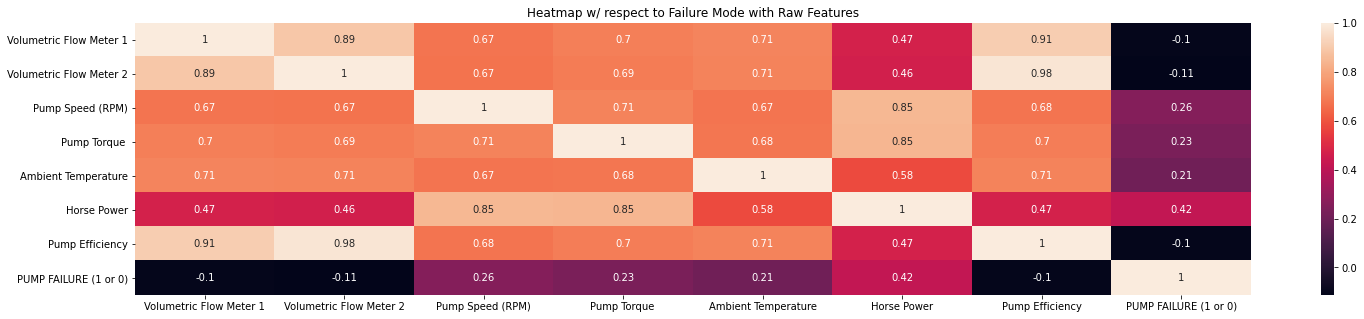

In [14]:
# (i)
dataframe_raw.set_index('TIMEFRAME (DD/MM/YYYY)', inplace=True)
dataframe_raw['PUMP FAILURE (1 or 0)'].fillna(0,inplace=True)
dataframe_raw.dropna(inplace=True)

# Specify variables
col = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)',
       'Pump Torque ', 'Ambient Temperature',
       'Horse Power', 'Pump Efficiency','PUMP FAILURE (1 or 0)']

# Create heatmap using seaborn
corrdf = dataframe_raw[col].corr()
dfheatmap = sns.heatmap(corrdf, annot=True)
plt.title("Heatmap w/ respect to Failure Mode with Raw Features")

#### We've included an example of what the output *may* look like below

**Open-ended Question:**

Which variables seem to correlate with Pump Failure?


Pump Speed, Pump Torque, Ambient Temperature and Horse Power seems to be positively correlated with Pump Fialure.
Whereas Volumetric Flow Meter 1, Volumetric Flow Meter 2 and Pump Efficiency seems to be negatively correlated.


### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
Create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order.

You can do this with the matplotlib library when you specify matplotlib.pyplot(kind='bar')


### Please put your code here

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

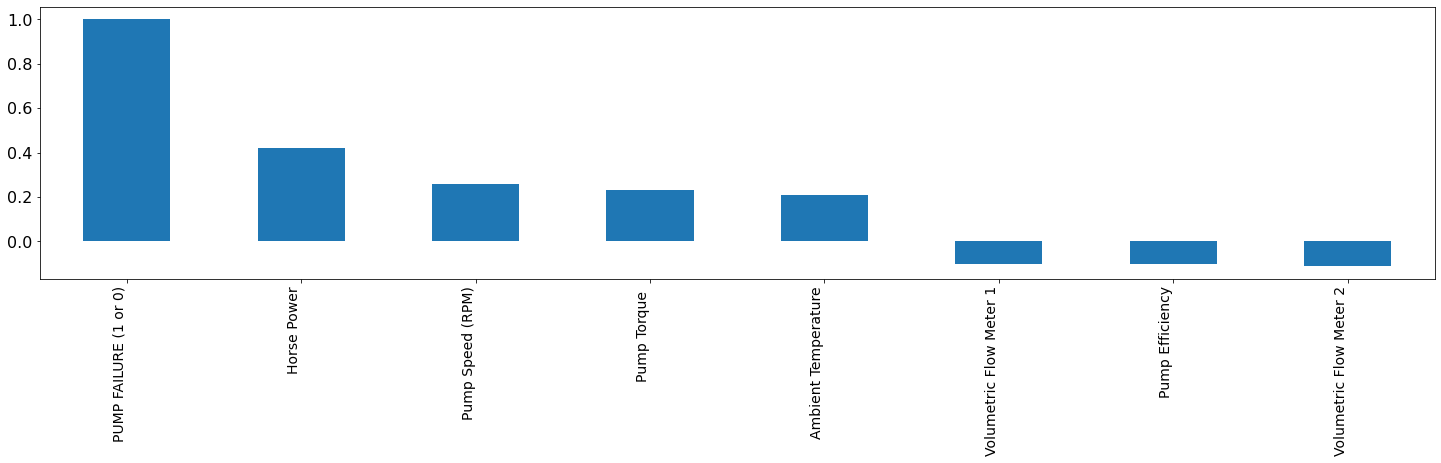

In [15]:
# Get the correlation found above
colList_corr = corrdf.columns
# Sort values
corrdf = corrdf.sort_values('PUMP FAILURE (1 or 0)', ascending=False)
# plot bar chart
corrdf['PUMP FAILURE (1 or 0)'].plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment='right', fontsize=14)
plt.yticks(fontsize = 16)

---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, you created a correlation matrix using 'raw' variables. We saw *some* correlations with the raw data but they weren't necessarily as strong as we would have liked. This time, we'll recreate a Heatmap using the rolling standard deviation dataframe you had imported in Q1.

ii) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R Squared) for all variables using the dataframe_stdev dataset.

Do any variables stand out? If yes, list these out below your heatmap.


## Please put your code here

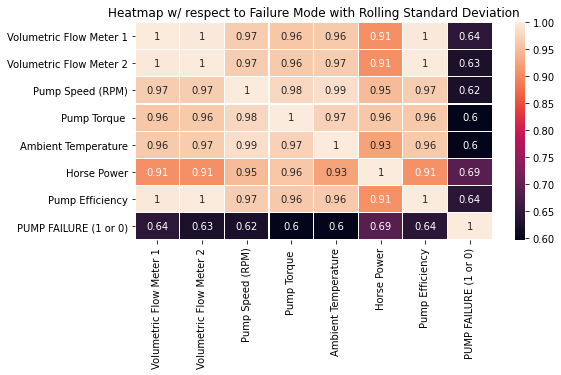

It can be seen in rolling standard deviation dataset, Horse Power, Pump Efficiency and Volumetric Flow Meter 1 seems to be strongly correlated to Pump Failure


In [16]:
# (ii)
# Import dataframe_stdev
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv', header=0)

# Drop columns not required
corr = dataframe_stdev.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)'],axis=1).corr()
fig, ax = plt.subplots(figsize=(8,4)) 
# Create heatmap
sns.heatmap(corr, annot=True,linewidths=.1, xticklabels=corr.columns.values, yticklabels=corr.columns.values, ax=ax)
plt.title("Heatmap w/ respect to Failure Mode with Rolling Standard Deviation")
plt.show()

# Specify if any variable stands out
print('It can be seen in rolling standard deviation dataset, Horse Power, Pump Efficiency and Volumetric Flow Meter 1 seems to be strongly correlated to Pump Failure')

### Creating a Multivariate Regression Model


When you worked on this case study in Excel, you went through the tricky process of using the rolling standard deviation variables to generate a regression equation. Happily, this process is much simpler in Python.  

For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 13: <span style="color:purple">Use OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables, which include every other variable that is not PUMP FAILURE (1 or 0).

In order to fit a linear regression model with statsmodels.api there are a few steps that need to be taken. We have demonstrated this below:
    ## Add a constant to follow the equation form: Ab + x (X = sm.add_constant(X))
    ## Instantiate the Ordinary Least Squares Model with: model = sm.OLS(Y,X) where Y is the dependent variable and X is the independent variable (Make sure you don't include the PUMP FAILURE (1 or 0) in your list of independent variables as this is what you are trying to predict)
    ## Fit the Model (OLSmodelResult = OLSmodel.fit())
    ## Print the OLSModel Summary 

Link: https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html

ii) Repeat i) but this time use the dataframe_stdev you imported previously. What is the R Squared for the model and what does this signify?



## Please put your code here 

In [18]:
# (i)
# Regression equation using dataframe_raw
dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
x = dataframe_raw.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)', 'PUMP FAILURE (1 or 0)'],axis=1)
y = dataframe_raw['PUMP FAILURE (1 or 0)']

x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()

print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Tue, 16 Feb 2021   Prob (F-statistic):          5.58e-233
Time:                           13:01:27   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [19]:
# (ii)
# Import dataframe stdev
df_stdev = pd.read_csv('DF_Rolling_Stdev.csv')

# Drop columns not required
x = df_stdev.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)', 'PUMP FAILURE (1 or 0)'],axis=1)
y = df_stdev['PUMP FAILURE (1 or 0)']

# Regression equation using dataframe_stdev
x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()

print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                           13:01:32   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

**Open-ended Question:**

### Which linear regression model seems to be a better fit? Why do you think this is the case?


Standard Deviation Model seems to be a much better fit and has a higher R-squared.

Great job creating those regressive equations! You've reached the final step of this case study!
### Step 14: <span style="color:purple">Validate Predictions</span> 
i) Use the regression equation you created in the previous step and apply the .predict() function to the dataframe to see whether or not your model 'picks' up the Pump Failure Event.  

ii) Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'

**Note:** Please ensure all axes are clearly labelled and ensure that you use Dual Axes to plot this.

## Please put your code here

0       0.012455
1       0.005693
2       0.001593
3      -0.004978
4      -0.009635
          ...   
2447    0.063612
2448    0.082757
2449    0.089230
2450    0.081646
2451    0.025040
Length: 2452, dtype: float64


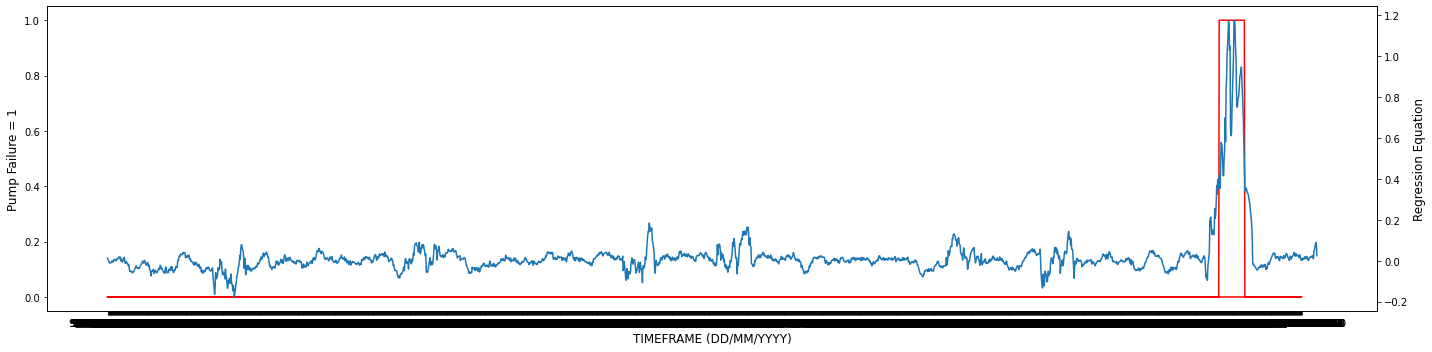

In [21]:
# (i)
plt.rcParams['figure.figsize'] = (20,5)

ypred = result.predict(x)
print(ypred)

# (ii)
time = df_stdev['TIMEFRAME (DD/MM/YYYY)']
label = df_stdev['PUMP FAILURE (1 or 0)']
pred = ypred

fig, ax1 = plt.subplots()

ax1.set_xlabel('TIMEFRAME (DD/MM/YYYY)', fontsize = 12)
ax1.set_ylabel('Pump Failure = 1', fontsize = 12)
ax1.plot(time, label, 'red')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('Regression Equation', fontsize = 12)
ax2.plot(pred)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.show()

You've made it to the end of this challenging case study — well done! You've now converted all of the analysis you did for Southern Water Corp using Excel into Python. You created visualizations using Seaborn, manipulated datasets with pandas, and so much more! This case study was designed to give you practice using Python to analyze datasets both large and small — you can now apply these skills to work you do throughout your career as a data analyst.

## Great job! Being able to complete this case study means that you're now proficient with the fundamentals of data analysis in Python!